In [2]:
def getStateData(num):
    try:
        import requests
        from bs4 import BeautifulSoup
        url = f"https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-{num}.htm"
        req = requests.get(url)
        # print(req)
        th = []
        td = []
        urls = []
        soup = BeautifulSoup(req.content,"html.parser")
        for i in soup.findAll("table",{"class":"table"}):
            for j in i.findAll("tr"):
                for k in j.findAll("th"):
                    th.append(k.text)
            for l in i.findAll("tr",{"class":"tr"}):
                for m in l.findAll("td"):
                    td.append(m.text.strip())
                    for link in m.findAll("a"):
                        urls.append("https://results.eci.gov.in/PcResultGenJune2024/" + link.get("href"))    
        thTop, thlow= th[:4], th[4:]
        n = 4
        split = [td[i:i + n] for i in range(0, len(td), n)]
        import pandas as pd
        df = pd.DataFrame(split)
        df.columns = thTop
        df.loc[len(df)] = thlow
        import numpy as np
        urls.append(np.nan)
        df['URL'] = urls
        pd.set_option('display.max_colwidth', None)
        return df
    except Exception as e:
        print(e)
getStateData("S01")

,Party,Won,Leading,Total,URL
0,Telugu Desam - TDP,16,0,16,https://results.eci.gov.in/PcResultGenJune2024/partywisewinresult-1745S01.htm
1,Yuvajana Sramika Rythu Congress Party - YSRCP,4,0,4,https://results.eci.gov.in/PcResultGenJune2024/partywisewinresult-1888S01.htm
2,Bharatiya Janata Party - BJP,3,0,3,https://results.eci.gov.in/PcResultGenJune2024/partywisewinresult-369S01.htm
3,Janasena Party - JnP,2,0,2,https://results.eci.gov.in/PcResultGenJune2024/partywisewinresult-860S01.htm
4,Total,25,0,25,NaN


In [3]:
def getPartywiseData(url):
    try:
        import requests
        from bs4 import BeautifulSoup
        import pandas as pd
        import numpy as np

        req = requests.get(url)
        # print(req)
        th = []
        td = []
        urls = []
        soup = BeautifulSoup(req.content,"html.parser")
        for i in soup.findAll("table",{"class":"table"}):
            for j in i.findAll("tr"):
                for k in j.findAll("th"):
                    th.append(k.text)
            for l in i.findAll("tr"):
                for m in l.findAll("td"):
                    td.append(m.text.strip())
                    for link in m.findAll("a"):
                        urls.append("https://results.eci.gov.in/PcResultGenJune2024/"+link.get("href"))    
        thTop= th
        n = 5
        split = [td[i:i + n] for i in range(0, len(td), n)]
        import pandas as pd
        df = pd.DataFrame(split)
        df.columns = thTop
        df['URL'] = urls

        pd.set_option('display.max_colwidth', None)
        return df
    except Exception as e:
        print(e)
getPartywiseData("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresult-369S01.htm")

,S.No,Parliament Constituency,Winning Candidate,Total Votes,Margin,URL
0,1,Anakapalle(5),C.M.RAMESH,762069,296530,https://results.eci.gov.in/PcResultGenJune2024/candidateswise-S015.htm
1,2,Rajahmundry(8),DAGGUBATI PURANDHESHWARI,726515,239139,https://results.eci.gov.in/PcResultGenJune2024/candidateswise-S018.htm
2,3,Narsapuram(9),BHUPATHI RAJU SRINIVASA VARMA (B.J.P.VARMA),707343,276802,https://results.eci.gov.in/PcResultGenJune2024/candidateswise-S019.htm


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 

In [ ]:
data = {
    'Party': [
        'Telugu Desam - TDP', 
        'Yuvajana Sramika Rythu Congress Party - YSRCP', 
        'Bharatiya Janata Party - BJP', 
        'Janasena Party - JnP', 
        'Total'
    ],
    'Won': [16, 4, 3, 2, 25],
    'Leading': [0, 0, 0, 0, 0],
    'Total': [16, 4, 3, 2, 25],
    'URL': [
        'https://results.eci.gov.in/PcResultGenJune2024/partywisewinresult-1745S01.htm',
        'https://results.eci.gov.in/PcResultGenJune2024/partywisewinresult-1888S01.htm',
        'https://results.eci.gov.in/PcResultGenJune2024/partywisewinresult-369S01.htm',
        'https://results.eci.gov.in/PcResultGenJune2024/partywisewinresult-860S01.htm',
        None
    ]
}

df = pd.DataFrame(data)
df


/var/folders/cd/201k2mk11l35s_bg2x7b61hr0000gn/T/ipykernel_74750/3828121570.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party', y='Won', data=df[:-1], palette='viridis')


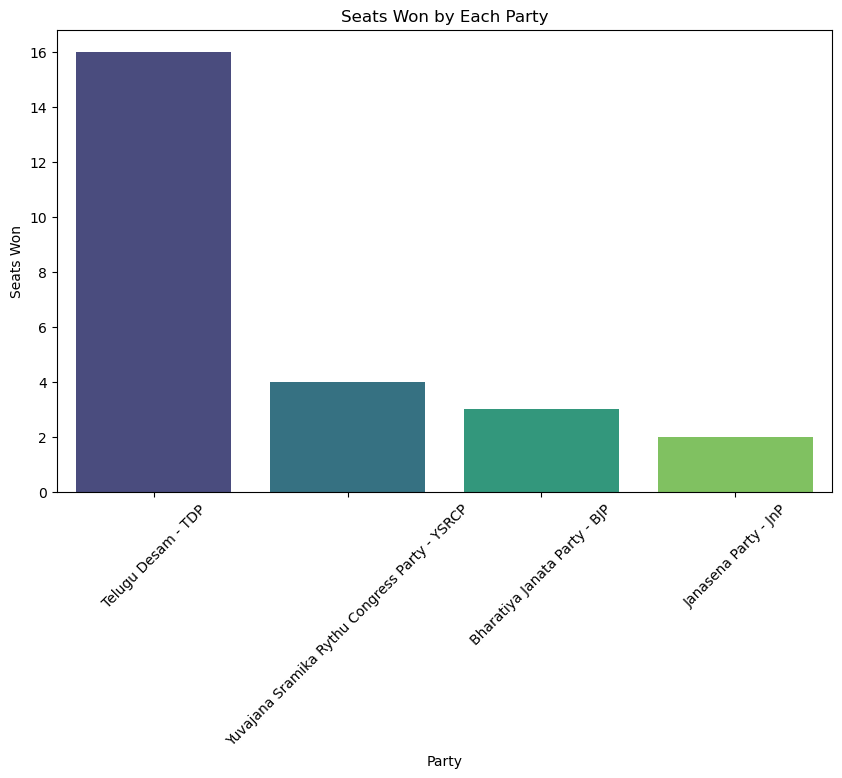

/var/folders/cd/201k2mk11l35s_bg2x7b61hr0000gn/T/ipykernel_74750/3828121570.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Party', data=df[:-1], palette='viridis')


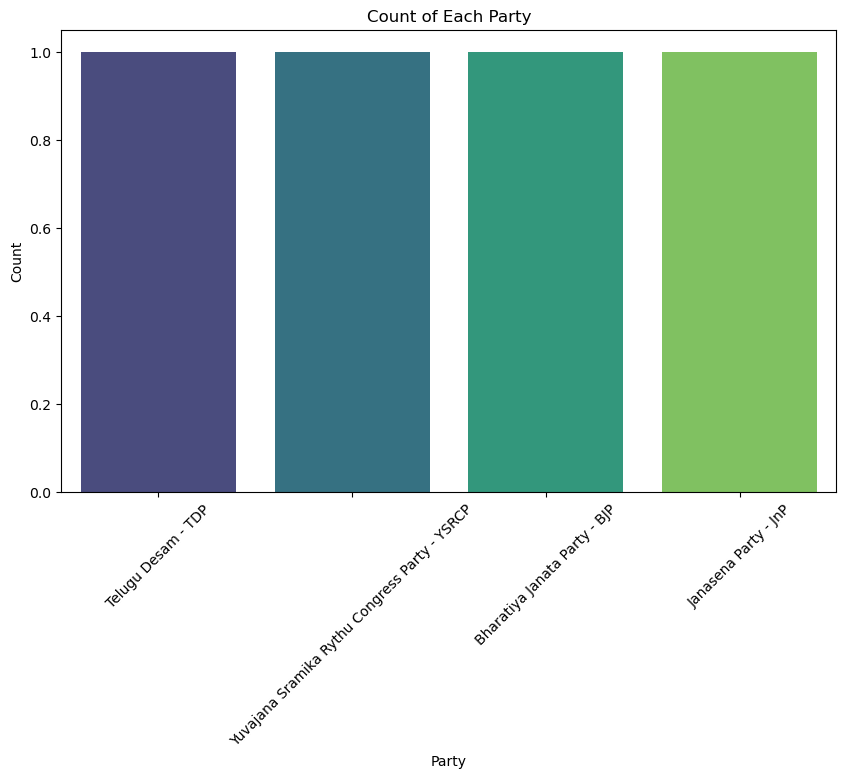

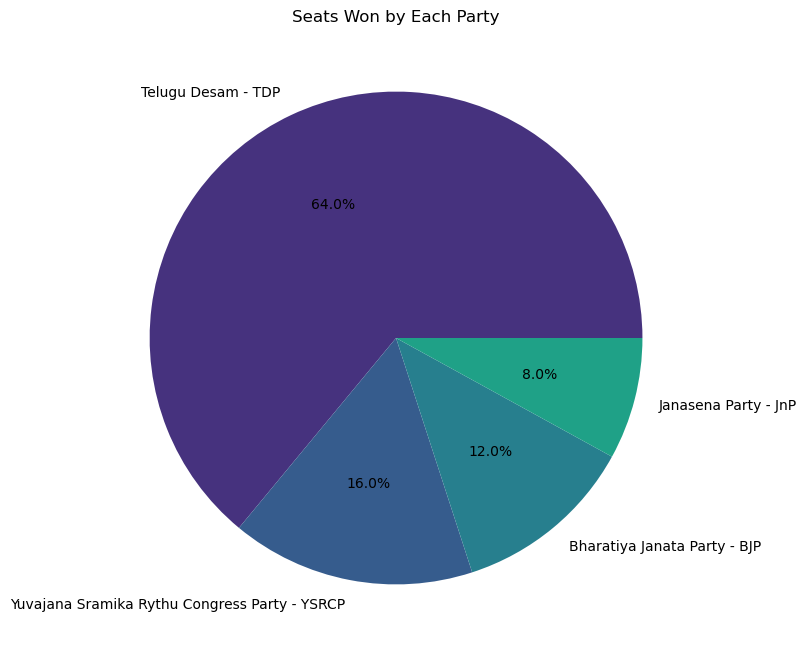

/var/folders/cd/201k2mk11l35s_bg2x7b61hr0000gn/T/ipykernel_74750/3828121570.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Won', y='Party', data=df[:-1], palette='viridis')


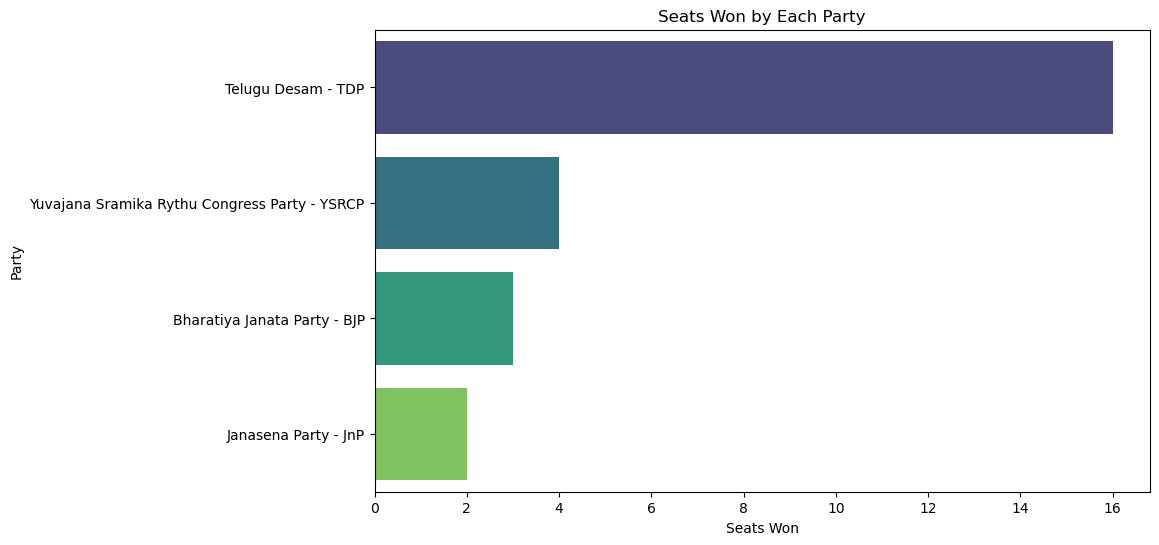

/var/folders/cd/201k2mk11l35s_bg2x7b61hr0000gn/T/ipykernel_74750/3828121570.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Total', data=df[:-1], palette='viridis')


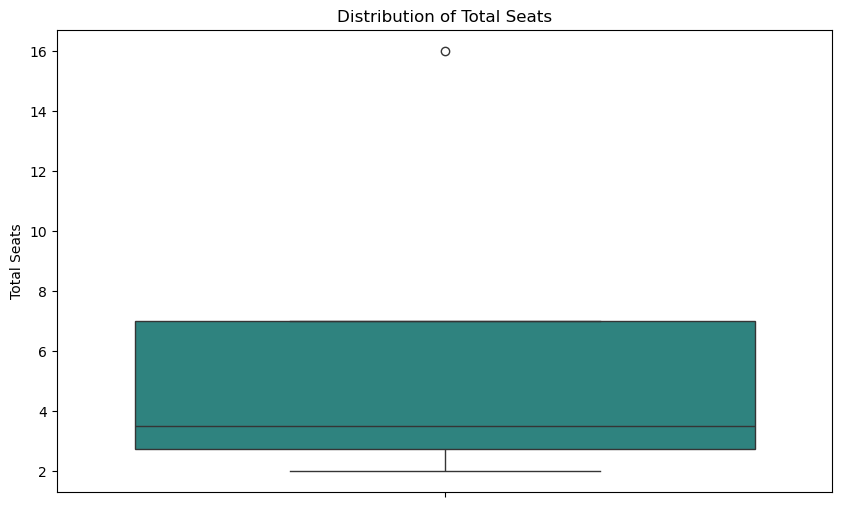

/var/folders/cd/201k2mk11l35s_bg2x7b61hr0000gn/T/ipykernel_74750/3828121570.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='Party', y='Won', data=df[:-1], palette='viridis')


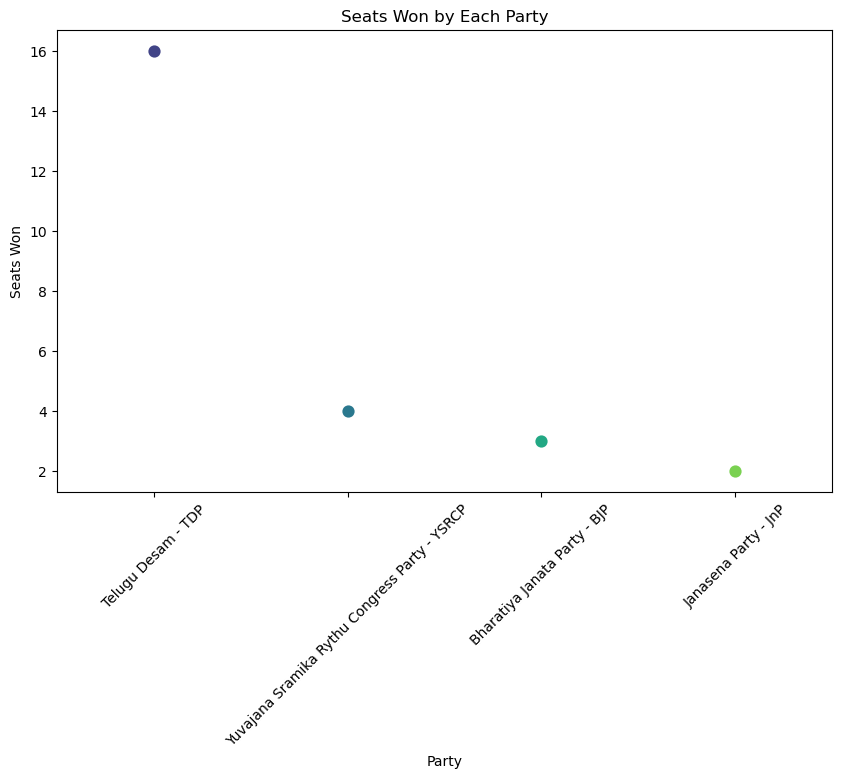

/var/folders/cd/201k2mk11l35s_bg2x7b61hr0000gn/T/ipykernel_74750/3828121570.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y='Total', data=df[:-1], palette='viridis')


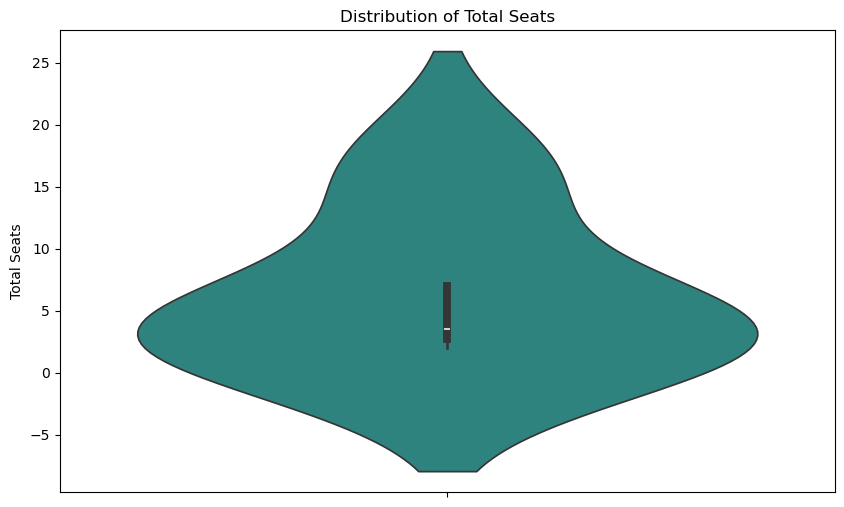

/var/folders/cd/201k2mk11l35s_bg2x7b61hr0000gn/T/ipykernel_74750/3828121570.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Party', y='Won', data=df[:-1], palette='viridis', size=10)


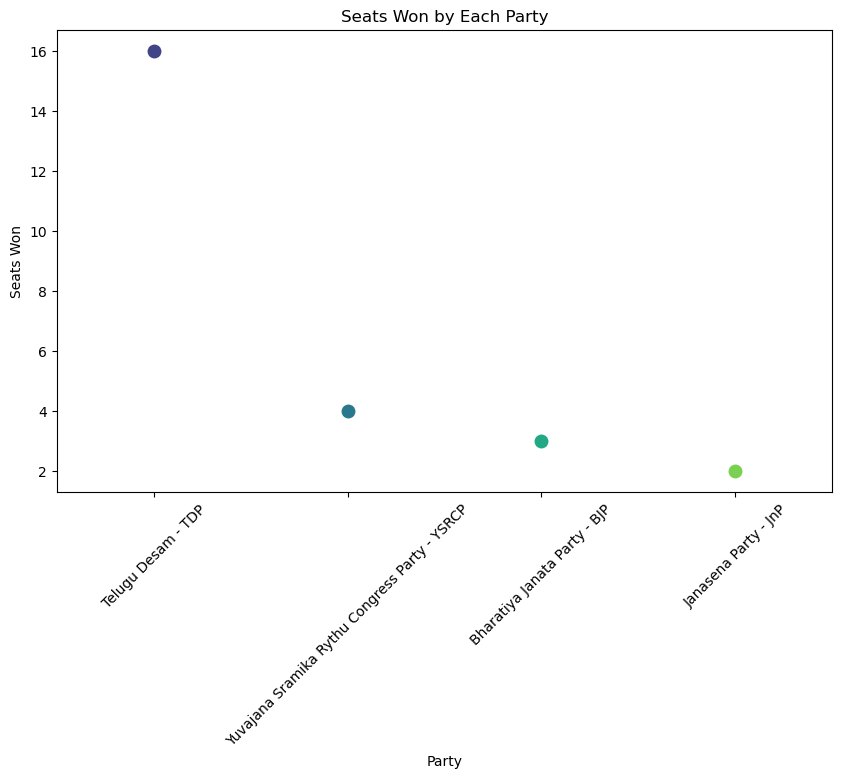

/var/folders/cd/201k2mk11l35s_bg2x7b61hr0000gn/T/ipykernel_74750/3828121570.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Party', y='Won', data=df[:-1], palette='viridis', size=10)


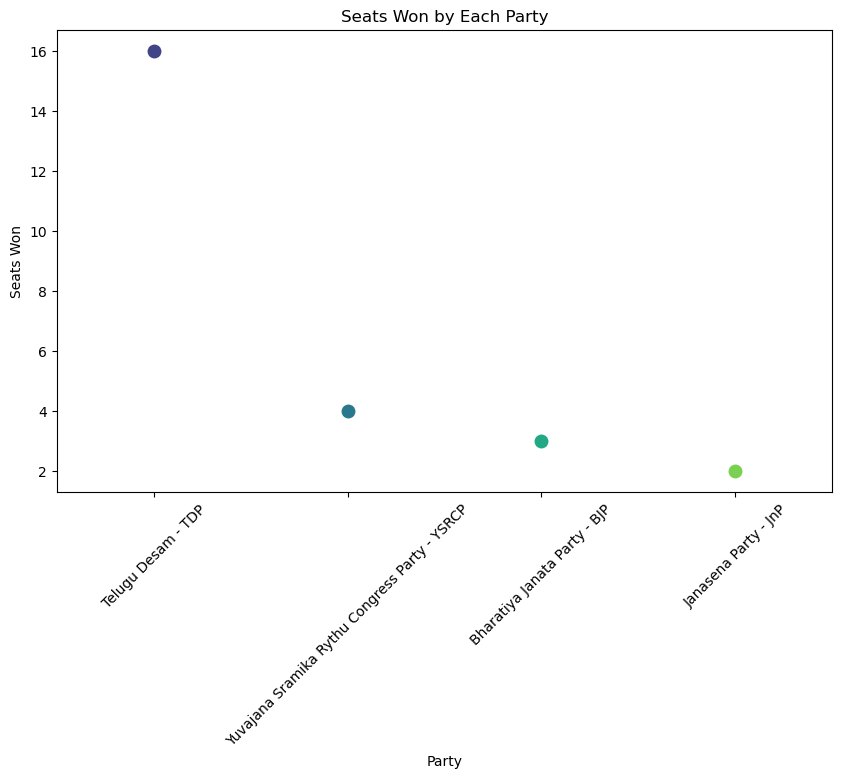

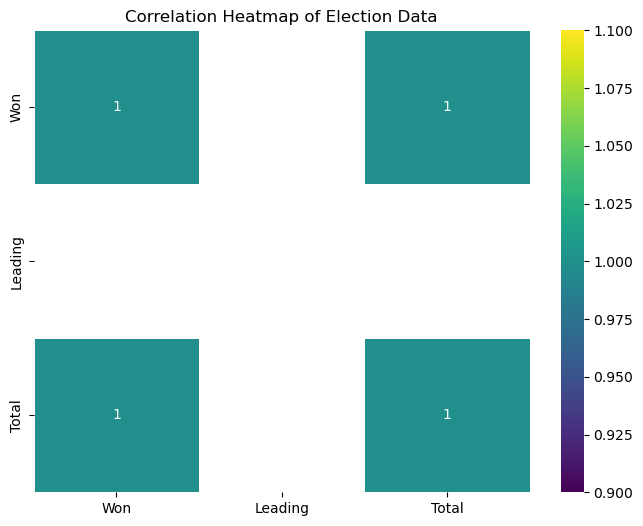

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame based on the provided data
data = {
    'Party': [
        'Telugu Desam - TDP', 
        'Yuvajana Sramika Rythu Congress Party - YSRCP', 
        'Bharatiya Janata Party - BJP', 
        'Janasena Party - JnP', 
        'Total'
    ],
    'Won': [16, 4, 3, 2, 25],
    'Leading': [0, 0, 0, 0, 0],
    'Total': [16, 4, 3, 2, 25],
    'URL': [
        'https://results.eci.gov.in/PcResultGenJune2024/partywisewinresult-1745S01.htm',
        'https://results.eci.gov.in/PcResultGenJune2024/partywisewinresult-1888S01.htm',
        'https://results.eci.gov.in/PcResultGenJune2024/partywisewinresult-369S01.htm',
        'https://results.eci.gov.in/PcResultGenJune2024/partywisewinresult-860S01.htm',
        None
    ]
}

df = pd.DataFrame(data)

# 1. Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Party', y='Won', data=df[:-1], palette='viridis')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.title('Seats Won by Each Party')
plt.xticks(rotation=45)
plt.show()

# 2. Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Party', data=df[:-1], palette='viridis')
plt.xlabel('Party')
plt.ylabel('Count')
plt.title('Count of Each Party')
plt.xticks(rotation=45)
plt.show()

# 3. Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(df[:-1]['Won'], labels=df[:-1]['Party'], autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Seats Won by Each Party')
plt.show()

# 4. Horizontal Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Won', y='Party', data=df[:-1], palette='viridis')
plt.xlabel('Seats Won')
plt.ylabel('Party')
plt.title('Seats Won by Each Party')
plt.show()

# 5. Box Plot (for Total Seats)
plt.figure(figsize=(10, 6))
sns.boxplot(y='Total', data=df[:-1], palette='viridis')
plt.ylabel('Total Seats')
plt.title('Distribution of Total Seats')
plt.show()

# 6. Point Plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Party', y='Won', data=df[:-1], palette='viridis')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.title('Seats Won by Each Party')
plt.xticks(rotation=45)
plt.show()

# 7. Violin Plot (for Total Seats)
plt.figure(figsize=(10, 6))
sns.violinplot(y='Total', data=df[:-1], palette='viridis')
plt.ylabel('Total Seats')
plt.title('Distribution of Total Seats')
plt.show()

# 8. Strip Plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='Party', y='Won', data=df[:-1], palette='viridis', size=10)
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.title('Seats Won by Each Party')
plt.xticks(rotation=45)
plt.show()

# 9. Swarm Plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Party', y='Won', data=df[:-1], palette='viridis', size=10)
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.title('Seats Won by Each Party')
plt.xticks(rotation=45)
plt.show()


correlation_matrix = df[['Won', 'Leading', 'Total']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Heatmap of Election Data')
plt.show()
